In [26]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
from keras.layers.normalization import BatchNormalization

## Download Dataset

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

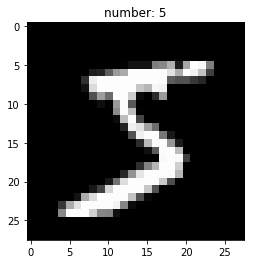

In [28]:
plt.title('number: %s' % y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.show()

## Karena tensorflow hanya menerima input berupa 3 dimensi, maka harus di reshape

In [29]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## Label harus berupa one-hot encoding

In [30]:
num_classes = 10

print('before: %r' % y_train[0:5])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('after: %s' % y_train[0:5])

before: array([5, 0, 4, 1, 9], dtype=uint8)
after: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Create model

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train,
          batch_size=8,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 350s 6ms/step - loss: 0.2340 - acc: 0.9310 - val_loss: 0.0445 - val_acc: 0.9846


In [34]:
x_train.shape

(60000, 28, 28, 1)

## Save Model

In [35]:
model.save('weight.h5')

## Load Model

In [36]:
model.load_weights('weight.h5')

## Using model to predict

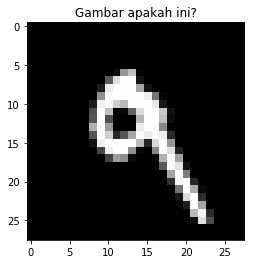

In [37]:
index = 7

char_input = x_test[index:index+1]
plt.title('Gambar apakah ini?')
plt.imshow(char_input[0].reshape(28, 28), cmap='gray')
plt.show()

In [38]:
label_output = model.predict(char_input)
'predictions: %r' % np.argmax(label_output)

'predictions: 9'